In [1]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.stats as stats
import numpy as np

In [2]:
#基礎的線性內插法
def intersectx(x1, y1, x2, y2, targety):
    return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)

def intersecty(x1, y1, x2, y2, targetx):
    return y1 + (y2 - y1)/ (x2 - x1) * (targetx - x1)

In [12]:
class ARmeasure:
    def __init__(self, file):
        with open(file, "r") as filename:
            self.ar = list(csv.reader(filename))
            self.Dk = []
            self.arzero = []
            self.arninety = []
            for j in range(500):
                zero = []
                ninety = []
                self.Dk.append(float(self.ar[0][2*j+1].split("Dk='")[1].split("'")[0]))
                for i in range(1, len(self.ar)):   
                    zero.append(float(self.ar[i][2*j+1]))
                    ninety.append(float(self.ar[i][2*j+2]))
                self.arzero.append(zero)
                self.arninety.append(ninety)
            self.arzeroLocalMax = []
            for arzero in self.arzero:
                former = arzero[0]
                localMax = dict()
                localls = []
                deg = []
                for i in range(1, len(arzero)-1):
                    if (former < arzero[i]) and (arzero[i] > arzero[i+1]):
                        localMax[arzero[i]] = i-180
                        localls.append(arzero[i])
                        deg.append(i)
                    former = arzero[i]
                self.arzeroLocalMax.append((localMax, localls, deg))

            self.arzeroLocalMin = []
            for arzero in self.arzero:
                former = arzero[0]
                localMin = dict()
                localls = []
                deg = []
                for i in range(1, len(arzero)-1):
                    if (former > arzero[i]) and (arzero[i] < arzero[i+1]):
                        localMin[arzero[i]] = i-180
                        localls.append(arzero[i])
                        deg.append(i)
                    former = arzero[i]
                self.arzeroLocalMin.append((localMin, localls, deg))
                  
    def centerWidth(self):
        out = []
        for i in range(len(self.arzeroLocalMin)):
            localMin, localls, deg = self.arzeroLocalMin[i][0], self.arzeroLocalMin[i][1], self.arzeroLocalMin[i][2]
            zero = self.arzero[i]
            #globalMin = min(localMin.keys())
            centerMin = zero[180]
            #print(localMin)
            #print(localls)
            #print(deg)
            #print(globalMin)
            #k = deg[localls.index(globalMin)]
            k = 180
            m = k
             # 低點
            #print(m)
            while zero[k] < centerMin +3 :
                #print(zero[k])
                k -= 1
            LF = intersectx(k-180, zero[k], k-179, zero[k+1], centerMin+3)
            # 高點
            while zero[m] < centerMin +3 :
                m += 1
            HF = intersectx(m-180, zero[m], m-181, zero[m-1], centerMin+3)
            BW = HF - LF
            out.append((centerMin, LF, HF, BW))
        return out
        #值得發現的有趣性質 : 中央點的軸比並不是0，而且對有些地方而言並不是最小值
    

In [4]:
cpar = ARmeasure('Datasets/500資料版/軸比 Plot.csv')

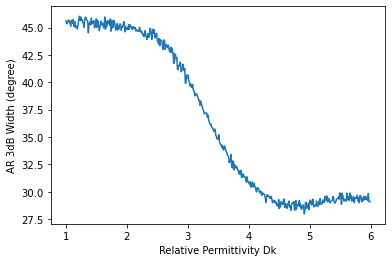

In [5]:
# Center 3dB Width
W = []
x = cpar.centerWidth()
for i in range(500):
    W.append(x[i][3])

plt.plot(cpar.Dk, W)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("AR 3dB Width (degree)")
plt.show()

In [6]:
# 全部曲線加以考量
print('Correlation Coefficient of Dk and Main Lobe Gain =',stats.pearsonr(cpar.Dk, W)[0])
print('')

# 分段後的結果 --  2.75 <= Dk <= 3.80 
print('Correlation Coefficient of Dk and AR 3dB Width (Dk = 2.75~3.80) =',stats.pearsonr(cpar.Dk[176:281], W[176:281])[0])
args6 = np.polyfit(cpar.Dk[176:281], W[176:281], 1)
print("Prediction Equation : y6 =", args6[0],"x +", args6[1])

Correlation Coefficient of Dk and Main Lobe Gain = -0.9462042094503833

Correlation Coefficient of Dk and AR 3dB Width (Dk = 2.75~3.80) = -0.9960535514631841
Prediction Equation : y6 = -10.422655001119526 x + 71.451431730769


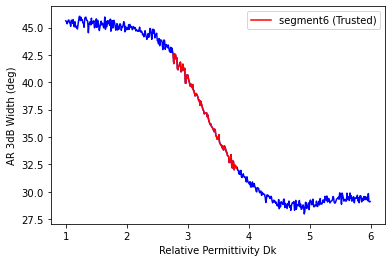

In [11]:
# 個別做出之全部範圍與信任區間
plt.plot(cpar.Dk, W, 'b')
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("AR 3dB Width (deg)")

plt.plot(cpar.Dk[176:281], W[176:281], 'r', label = 'segment6 (Trusted)')
plt.legend()
plt.show()